# Plot LabChart Recordings

### This notebook will help you explore and plot *any* exported .txt file from LabChart.

<mark>To run this, you will need to upload an exported .txt file from LabChart into your DataHub. Follow the instructions in your Lab Manual for how to export files. You should only export the channels you'd like to plot.</mark>

>**Task**: Run the cell below to import our necessary packages and configure the notebook environment.

In [ ]:
# Import our packages
import matplotlib.pyplot as plt
import numpy as np

# Decide if you want plots to be interactive or not
# Set interactive to True if you do want interaction
interactive = False

if interactive:
    print('Figures are interactive.')
    # Set up interactive matplot lib and define a function to interact with plots
    %matplotlib nbagg
    def onclick(event):
        pos.append([event.xdata,event.ydata])

else:
    print('Figures are not interactive.')
    %matplotlib inline 
    %config InlineBackend.figure_format = 'retina'

print('Packages imported.')

## Import data
Now that we have our notebook configured, we can import our data. We will import it as a numpy array.

To do so:

1. Upload your file into the same folder as this code.
2. Change the filename below to your filename.
3. Define a list of column names. If you exported one channel, you'll have just two columns, given as two strings in a list: `['time','recording']`. This is in the code by default. However, you should add a column name **if** you exported more than one channel. In other words, you could write `['time','recording_1','recording_2']`.

In [24]:
# Change the filename to EXACTLY match your file
filename = 'recording.txt'

# Define column names
columns = ['time', 'recording']

# Use numpy genfromtxt to import
data = np.genfromtxt(filename, dtype=float, skip_header=6, delimiter='\t', names=columns)
data['recording']

array([ 0.      ,  0.      ,  0.00125 ,  0.0025  ,  0.005   ,  0.00875 ,
        0.0125  ,  0.01625 ,  0.020625,  0.025   ,  0.028125,  0.03125 ,
        0.0325  ,  0.034375,  0.035   ,  0.035   ,  0.034375,  0.034375,
        0.034375,  0.03375 ,  0.034375,  0.034375,  0.034375,  0.035   ,
        0.035625,  0.03625 ,  0.036875,  0.036875,  0.036875,  0.0375  ,
        0.0375  ,  0.0375  ,  0.0375  ,  0.0375  ,  0.036875,  0.03625 ,
        0.035625,  0.035625,  0.035   ,  0.035   ,  0.038125,  0.053125,
        0.084375,  0.136875,  0.205625,  0.280625,  0.34125 ,  0.36875 ,
        0.348125,  0.280625,  0.175625,  0.05625 , -0.055   , -0.13875 ,
       -0.186875, -0.199375, -0.18625 , -0.1575  , -0.121875, -0.085625,
       -0.05375 , -0.02625 , -0.005625,  0.009375,  0.019375,  0.025625,
        0.02875 ,  0.029375,  0.029375,  0.028125,  0.0275  ,  0.02625 ,
        0.025625,  0.025   ,  0.024375,  0.024375])

## Plot data
The code below will plot your data! You just need to add x and y labels. Please note that LabChart data *should* export by volts and second by default.

**Note on using the interactive plot** (only if you set interactive to True above): The x (time, in ms) and y (voltage, in volts) position of your cursor will update in the bottom left corner. You can use these values to make your calculations, if necessary. You can create a box to Zoom into using the Zoom button below, and return to the home view using the Home button. The crosshairs button will allow you to pan through the recording.

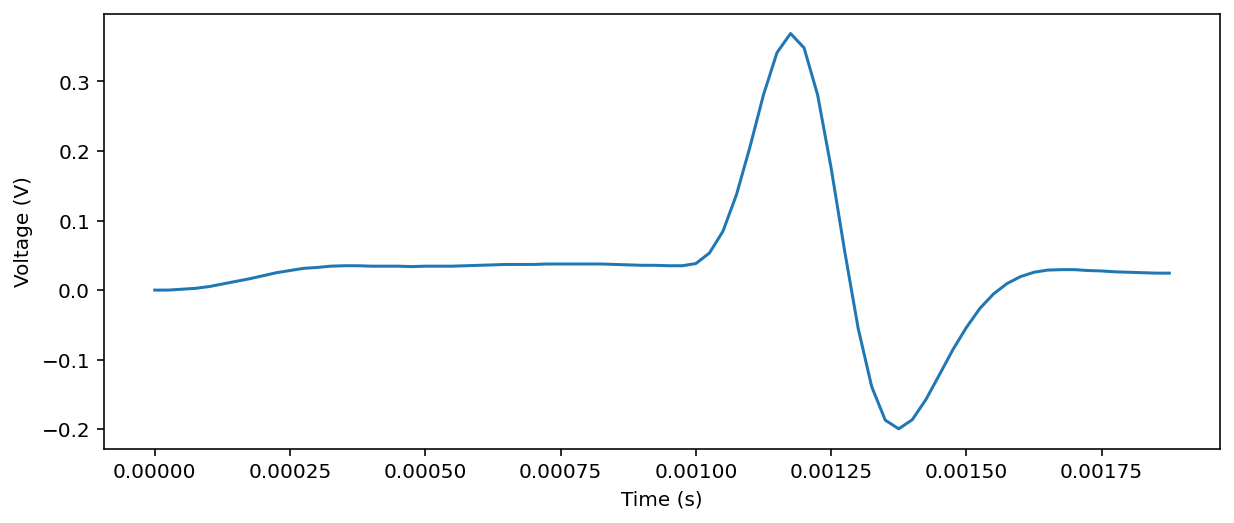

In [23]:
# Set up figure & plot
fig,ax = plt.subplots(figsize=(10,4))

plt.plot(data['time'],data['recording'])

# X label
plt.xlabel('LABEL') 

# Y label
plt.ylabel('LABEL') 

# This makes the axis labels print without scientific notation
# You can comment this line if you do not wish to use it
ax.ticklabel_format(useOffset=False, style='plain') 

# You can uncomment the line below to restrict the x axis plotting
#plt.xlim([200,700])

plt.show()